In [22]:
from collections import Counter
from collections import defaultdict
from scipy.spatial import distance
import matplotlib.pyplot as plt
import re
from __future__ import division
import random
import numpy as np
import math

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

labels = [([5,1],"Cobol"),
          ([5,3],"Pascal"),
          ([2,3],"Pascal"),
          ([3,4],"Fortran"),
          ([4,2],"Fortran"),
          ([4,5],"Fortran"),
          ([3,3],"Cobol"),
          ([2,2],"Pascal")]



In [68]:
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    if num_winners == 1:
        return winner # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

In [83]:
import re

segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders(plt, color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""
    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points, key=lambda (point): distance.euclidean(point[0], new_point))
    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]
    # and let them vote
    return majority_vote(k_nearest_labels)


In [75]:
cities = [([-122.3 , 47.53], "Python"), # Seattle
          ([-120.3 , 51.53], "Python"), # Random
          ([-121.8 , 42.53], "Python"), # Random
          ([-114.5 , 44.53], "Python"), # Random
          ([-114.1 , 41.33], "Python"), # Random
          ([-104.1 , 40.83], "Python"), # Random
          ([-106.9 , 36.93], "Python"), # Random
          ([-91.3 , 35.99], "Python"), # Random
          ([ -96.85, 32.85], "Java"),   # Austin
          ([ -93.85, 29.85], "Java"),   # Random
          ([ -95.85, 35.85], "Java"),   # Random
          ([ -83.85, 37.45], "Java"),   # Random
          ([ -87.95, 33.05], "Java"),   # Random
          ([ -104.95, 38.05], "Java"),  # Random
          ([ -99.15, 49.05], "Java"),  # Random
          ([ -100.1, 43.07], "Java"),  # Random
          ([ -89.33, 43.13], "R"),      # Madison
          ([ -93.33, 44.53], "R"),      # Random
          ([ -91.33, 41.13], "R"),      # Random
          ([ -99.33, 45.13], "R"),      # Random
          ([ -90.33, 47.53], "R"),      # Random
          ([ -104.95, 48.05], "R"),     # Random 
          ([ -119.95, 34.95], "R"),     # Random 
          ([ -98.11, 39.95], "R"),     # Random 
          # ... and so on
]
#cities = [([-86.75,33.5666666666667],'Python'),([-88.25,30.6833333333333],'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]

knn_classify(7, cities, [-95.5362, 37.5235])

'R'

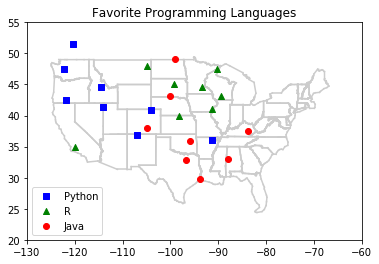

In [67]:
# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
# we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors = { "Java" : "r", "Python" : "b", "R" : "g" }
for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)
# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
    label=language, zorder=10)
plot_state_borders(plt) # pretend we have a function that does this
plt.legend(loc=0) # let matplotlib choose the location
plt.axis([-130,-60,20,55]) # set the axes
plt.title("Favorite Programming Languages")
plt.show()

In [84]:
for k in [1, 3, 5, 7, 13, 17, 23]:
    num_correct = 0
    for city in cities:
        location, actual_language = city
        other_cities = [other_city for other_city in cities if other_city != city]
        predicted_language = knn_classify(k, other_cities, location)
        if predicted_language == actual_language:
            num_correct += 1
    print k, "neighbor[s]:", num_correct, "correct out of", len(cities)

1 neighbor[s]: 13 correct out of 24
3 neighbor[s]: 15 correct out of 24
5 neighbor[s]: 15 correct out of 24
7 neighbor[s]: 17 correct out of 24
13 neighbor[s]: 13 correct out of 24
17 neighbor[s]: 12 correct out of 24
23 neighbor[s]: 0 correct out of 24


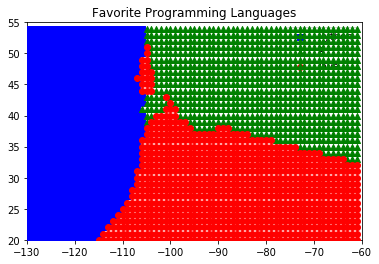

In [85]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
k = 7 # or 3, or 5, or…
for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)
        
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
    label=language, zorder=10)
    
plt.legend(loc=0) # let matplotlib choose the location
plt.axis([-130,-60,20,55]) # set the axes
plt.title("Favorite Programming Languages")
plt.show()
    

In [79]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance.euclidean(random_point(dim), random_point(dim))
        for _ in range(num_pairs)]

dimensions = range(1, 101)
avg_distances = []
min_distances = []
random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 10000) # 10,000 random pairs
    avg_distances.append(np.mean(distances)) # track the average
    min_distances.append(np.min(distances)) # track the minimum

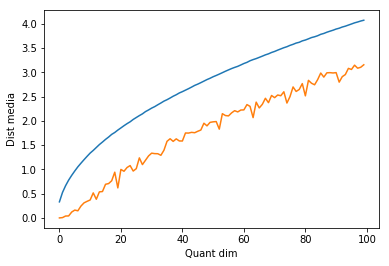

In [80]:
plt.plot(avg_distances)
plt.plot(min_distances)
plt.ylabel('Dist media')
plt.xlabel('Quant dim')
plt.show()

In [81]:
min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist in zip(min_distances, avg_distances)]


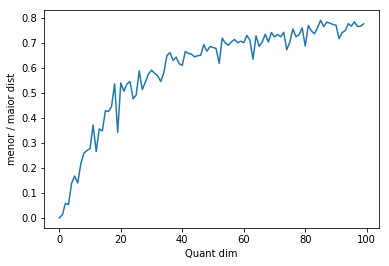

In [82]:
plt.plot(min_avg_ratio)
plt.ylabel("menor / maior dist")
plt.xlabel("Quant dim")
plt.show()

Aula 20/08/2018

In [3]:
def tokenize(message):
    message = message.lower() # convert to lowercase
    all_words = re.findall("[a-z0-9']+", message) # extract the words
    return set(all_words) # remove duplicates

def count_words(training_set):
    """training set consists of pairs (message, is_spam)"""
    counts = defaultdict(lambda: [0, 0])
    for message, is_spam in training_set:
        for word in tokenize(message):
            counts[word][0 if is_spam else 1] += 1
    return counts

In [7]:
def word_probabilities(counts, total_spams, total_non_spams, k=0.5):
    """turn the word_counts into a list of triplets w, p(w | spam) and p(w | ~spam)"""
    return [(w,
            (spam + k) / (total_spams + 2 * k),
            (non_spam + k) / (total_non_spams + 2 * k))
            for w, (spam, non_spam) in counts.iteritems()]

In [8]:
def spam_probability(word_probs, message):
    message_words = tokenize(message)
    log_prob_if_spam = log_prob_if_not_spam = 0.0
    
    # iterate through each word in our vocabulary
    for word, prob_if_spam, prob_if_not_spam in word_probs:
        # if *word* appears in the message,
        # add the log probability of seeing it
        if word in message_words:
            log_prob_if_spam += math.log(prob_if_spam)
            log_prob_if_not_spam += math.log(prob_if_not_spam)
        # if *word* doesn't appear in the message
        # add the log probability of _not_ seeing it
        # which is log(1 - probability of seeing it)
        else:
            log_prob_if_spam += math.log(1.0 - prob_if_spam)
            log_prob_if_not_spam += math.log(1.0 - prob_if_not_spam)
    prob_if_spam = math.exp(log_prob_if_spam)
    prob_if_not_spam = math.exp(log_prob_if_not_spam)
    return prob_if_spam / (prob_if_spam + prob_if_not_spam)

defaultdict(<function <lambda> at 0x00000000091CE358>, {})


In [14]:
class NaiveBayesClassifier:
    def __init__(self, k=0.5):
        self.k = k
        self.word_probs = []
    def train(self, training_set):
        # count spam and non-spam messages
        num_spams = len([is_spam
                        for message, is_spam in training_set
                        if is_spam])
        num_non_spams = len(training_set) - num_spams
        
        # run training data through our "pipeline"
        word_counts = count_words(training_set)
        self.word_probs = word_probabilities(word_counts,
                                            num_spams,
                                            num_non_spams,
                                            self.k)
    def classify(self, message):
        return spam_probability(self.word_probs, message)

In [15]:
import glob, re
# modify the path with wherever you've put the files
path = r"H:\spam\*\*"
data = []
# glob.glob returns every filename that matches the wildcarded path
for fn in glob.glob(path):
    is_spam = "ham" not in fn
    
    with open(fn,'r') as file:
        for line in file:
            if line.startswith("Subject:"):
                # remove the leading "Subject: " and keep what's left
                subject = re.sub(r"^Subject: ", "", line).strip()
                data.append((subject, is_spam))

In [16]:
data

[('Re: New Sequences Window', False),
 ('[zzzzteana] RE: Alexander', False),
 ('[zzzzteana] Moscow bomber', False),
 ("[IRR] Klez: The Virus That  Won't Die", False),
 ('Re: Insert signature', False),
 ('Re: [zzzzteana] Nothing like mama used to make', False),
 ('Re: [zzzzteana] Nothing like mama used to make', False),
 ('[zzzzteana] Playboy wants to go out with a bang', False),
 ('Re: [zzzzteana] Nothing like mama used to make', False),
 ('[zzzzteana] Meaningful sentences', False),
 ('Re: New Sequences Window', False),
 ('[SAtalk] SA CGI Configurator Scripts', False),
 ('[SAdev] Interesting approach to Spam handling..', False),
 ('Re: New Sequences Window', False),
 ('[SAdev] Party in San Francisco tonight', False),
 ('Re: [SAdev] Live Rule Updates after Release ???', False),
 ('[ILUG] Re: Problems with RAID1 on cobalt raq3', False),
 ('Re: New Sequences Window', False),
 ('The case for spam', False),
 ("[IIU] Eircom aDSL Nat'ing", False),
 ('[zzzzteana] Re: Australian Catholic Kiddie

In [17]:
import random

def split_data(data, prob):
    """dividi os dados em fracoes [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

In [18]:
random.seed(0)
train_data, test_data = split_data(data, 0.75)

In [19]:
classifier = NaiveBayesClassifier()
classifier.train(train_data)

In [26]:
print classifier.classify("Life Insurance - Why Pay More?")
print classifier.classify("This week: Deck, Tex-Edit Plus, Boom")

0.81374018478
0.0772708519782


In [32]:
print classifier.classify("I wanna suck your dick")

0.482204708318


In [33]:
classified = [(subject, is_spam, classifier.classify(subject))
                for subject, is_spam in test_data]

# assume that spam_probability > 0.5 corresponds to spam prediction
# and count the combinations of (actual is_spam, predicted is_spam)
counts = Counter((is_spam, spam_probability > 0.5)
                for _, is_spam, spam_probability in classified)

In [34]:
print classified


[('Re: New Sequences Window', False, 1.749278773689474e-05), ('[zzzzteana] RE: Alexander', False, 4.3672233073409156e-05), ('Re: [zzzzteana] Nothing like mama used to make', False, 0.0006355823082921568), ('Re: New Sequences Window', False, 1.749278773689474e-05), ('Re: New Sequences Window', False, 1.749278773689474e-05), ('[ILUG] Re: Problems with RAID1 on cobalt raq3', False, 0.0014660556345886153), ('Re: New Sequences Window', False, 1.749278773689474e-05), ('The case for spam', False, 0.0017751881200805768), ("[IIU] Eircom aDSL Nat'ing", False, 0.06839623756957414), ('[zzzzteana] Which Muppet Are You?', False, 0.03531988332855482), ('Re: [zzzzteana] Which Muppet Are You?', False, 0.0032246474485710043), ('Re: CVS report', False, 1.622072900720748e-05), ("RE: The Curse of India's Socialism", False, 3.929144346823492e-05), ('Re: CVS report', False, 1.622072900720748e-05), ('Anolther sequence related traceback', False, 6.0794093875607084e-05), ('Re: lifegem', False, 0.000633037099158

In [36]:
print counts

Counter({(False, False): 704, (True, True): 101, (True, False): 38, (False, True): 33})
